<a href="https://colab.research.google.com/github/debtavares/Projeto-Kaggle/blob/main/Machine_Learning_%7C_Solu%C3%A7%C3%A3o_completa_end_to_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning | Solução completa end-to-end
Objetivo: utilizar as variáveis para prever o valor do aluguel

In [1]:
# libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# avisos
import warnings
warnings.filterwarnings('ignore')

# configuração no pandas (simplifica a qnt de linhas e colunas que chamou na base de dados)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# configuração no matplotlib
plt.rcParams['figure.figsize'] = (15,6)  # ajusta o tamanho
plt.style.use('seaborn-darkgrid')

# **Exploração dos dados**

In [2]:
bd = pd.read_csv('house_data.csv')
bd.shape

(10692, 13)

In [3]:
bd.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
# vamos remover as variáveis que não vamos utilizar nesse processo

bd.drop(columns=['fire insurance (R$)', 'total (R$)'], inplace=True)

In [5]:
bd.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


In [6]:
# campos vazios
bd.isnull().sum().sort_values(ascending=False)

city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor                0
animal               0
furniture            0
hoa (R$)             0
rent amount (R$)     0
property tax (R$)    0
dtype: int64

In [7]:
# campos unicos
bd.nunique()

city                    5
area                  517
rooms                  11
bathroom               10
parking spaces         11
floor                  35
animal                  2
furniture               2
hoa (R$)             1679
rent amount (R$)     1195
property tax (R$)    1243
dtype: int64

In [8]:
# temos 5 cidades, 517 registros de areas...

In [9]:
# tipos
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               10692 non-null  object
 1   area               10692 non-null  int64 
 2   rooms              10692 non-null  int64 
 3   bathroom           10692 non-null  int64 
 4   parking spaces     10692 non-null  int64 
 5   floor              10692 non-null  object
 6   animal             10692 non-null  object
 7   furniture          10692 non-null  object
 8   hoa (R$)           10692 non-null  int64 
 9   rent amount (R$)   10692 non-null  int64 
 10  property tax (R$)  10692 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 919.0+ KB


In [10]:
bd.dtypes.value_counts()

int64     7
object    4
dtype: int64

# **Exploração Analitica (EDA)**

In [11]:
bd.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)'],
      dtype='object')

In [12]:
# Filtrar os tipos de colunas
colunas_categoricas = bd.columns [ bd.dtypes == object]
colunas_numericas = bd.columns [ bd.dtypes != object]

colunas_categoricas, colunas_numericas

(Index(['city', 'floor', 'animal', 'furniture'], dtype='object'),
 Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)',
        'rent amount (R$)', 'property tax (R$)'],
       dtype='object'))

In [13]:
# Fotografia
# Supondo que quando treinou o modelo, 90% dos imóveis aceitavam animais. Porém, no semestre subsequente, apenas 50% aceitavam animais
# isso pode acabar mexendo nos padrões da base de dados e piorar o resultado do modelo
# por isso é bom tirar uma fotografia, entender esses comportamentos, para caso precise retreinar se tenha a informação de como a base de dados estava antes

In [14]:
# Analise dos campos categoricos (object)
# bd['city'].value_counts()                        # contagem dos valores da coluna cidade do bd
bd['city'].value_counts(normalize=True) * 100      # porcentagem dos valores da coluna cidade do bd

São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64

<Axes: ylabel='city'>

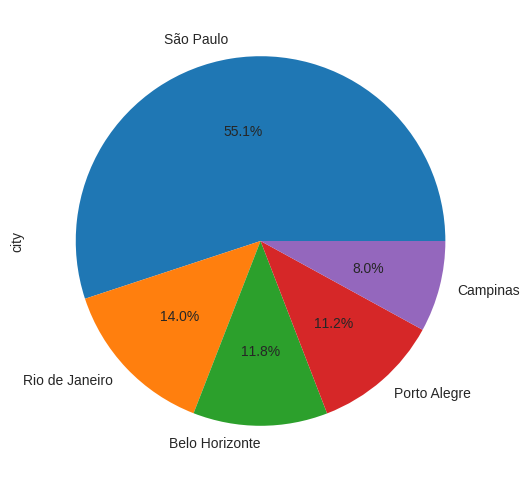

In [15]:
cidades = bd['city'].value_counts(normalize=True) * 100      # porcentagem dos valores da coluna cidade do bd
# cidades.plot(kind='pie')                                   # plota um gráfico do tipo pizza
cidades.plot(kind='pie', autopct='%1.1f%%')                  # plota um gráfico do tipo pizza e exibe as porcentagens no gráfico

In [16]:
# Mas quero fazer isso para todas as colunas categóricas
# Podemos fazer um loop

for coluna in colunas_categoricas:
  analise = bd[coluna].value_counts(normalize=True) * 100
  print(coluna, '\n', analise, '\n') # nome da coluna e objetos


city 
 São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64 

floor 
 -      23.017209
1      10.110363
2       9.212495
3       8.707445
4       6.995885
5       5.611672
6       5.041152
7       4.648335
8       4.582866
9       3.451178
10      3.338945
11      2.833895
12      2.403666
13      1.870557
14      1.589974
15      1.374860
16      1.019454
17      0.897868
18      0.701459
19      0.495698
20      0.411523
21      0.392817
25      0.233820
23      0.233820
22      0.224467
26      0.187056
24      0.177703
27      0.074822
28      0.056117
29      0.046764
32      0.018706
35      0.009353
46      0.009353
301     0.009353
51      0.009353
Name: floor, dtype: float64 

animal 
 acept        77.777778
not acept    22.222222
Name: animal, dtype: float64 

furniture 
 not furnished    75.626637
furnished        24.373363
Name: furniture, dtype: float64 



In [17]:
# correcao nos dados

# ajustando o andar 301
# o comando loc vem de localizar
bd.loc[bd['floor'] == '301']

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
2562,Belo Horizonte,80,3,2,2,301,acept,not furnished,750,2600,164


In [18]:
# pelo iloc passamos o id, coluna e fazemos a correcao direto na tabela
bd.iloc[2562, 5] = '30'

In [19]:
bd.loc[bd['floor'] == '301']
# não encontrou nada porque fizemos o ajuste

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)


In [20]:
bd.loc[bd['floor'] == '30']

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
2562,Belo Horizonte,80,3,2,2,30,acept,not furnished,750,2600,164


In [21]:
# ajustando o andar -
bd['floor'] = bd['floor'].apply( lambda Registro : 0 if Registro == '-' else Registro)     # o apply permite realizar funções na coluna

In [22]:
pd.to_numeric(bd['floor'])

0         7
1        20
2         6
3         2
4         1
         ..
10687     5
10688    17
10689     8
10690     8
10691     0
Name: floor, Length: 10692, dtype: int64

In [23]:
bd['floor'] = pd.to_numeric(bd['floor']) # vamos aplicar a mudança no bd

In [24]:
bd.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165


In [25]:
bd['floor'].value_counts(normalize=True)

0     0.230172
1     0.101104
2     0.092125
3     0.087074
4     0.069959
5     0.056117
6     0.050412
7     0.046483
8     0.045829
9     0.034512
10    0.033389
11    0.028339
12    0.024037
13    0.018706
14    0.015900
15    0.013749
16    0.010195
17    0.008979
18    0.007015
19    0.004957
20    0.004115
21    0.003928
25    0.002338
23    0.002338
22    0.002245
26    0.001871
24    0.001777
27    0.000748
28    0.000561
29    0.000468
32    0.000187
35    0.000094
46    0.000094
30    0.000094
51    0.000094
Name: floor, dtype: float64

In [26]:
# ajustamos o andar '-' e o 301

In [27]:
bd.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


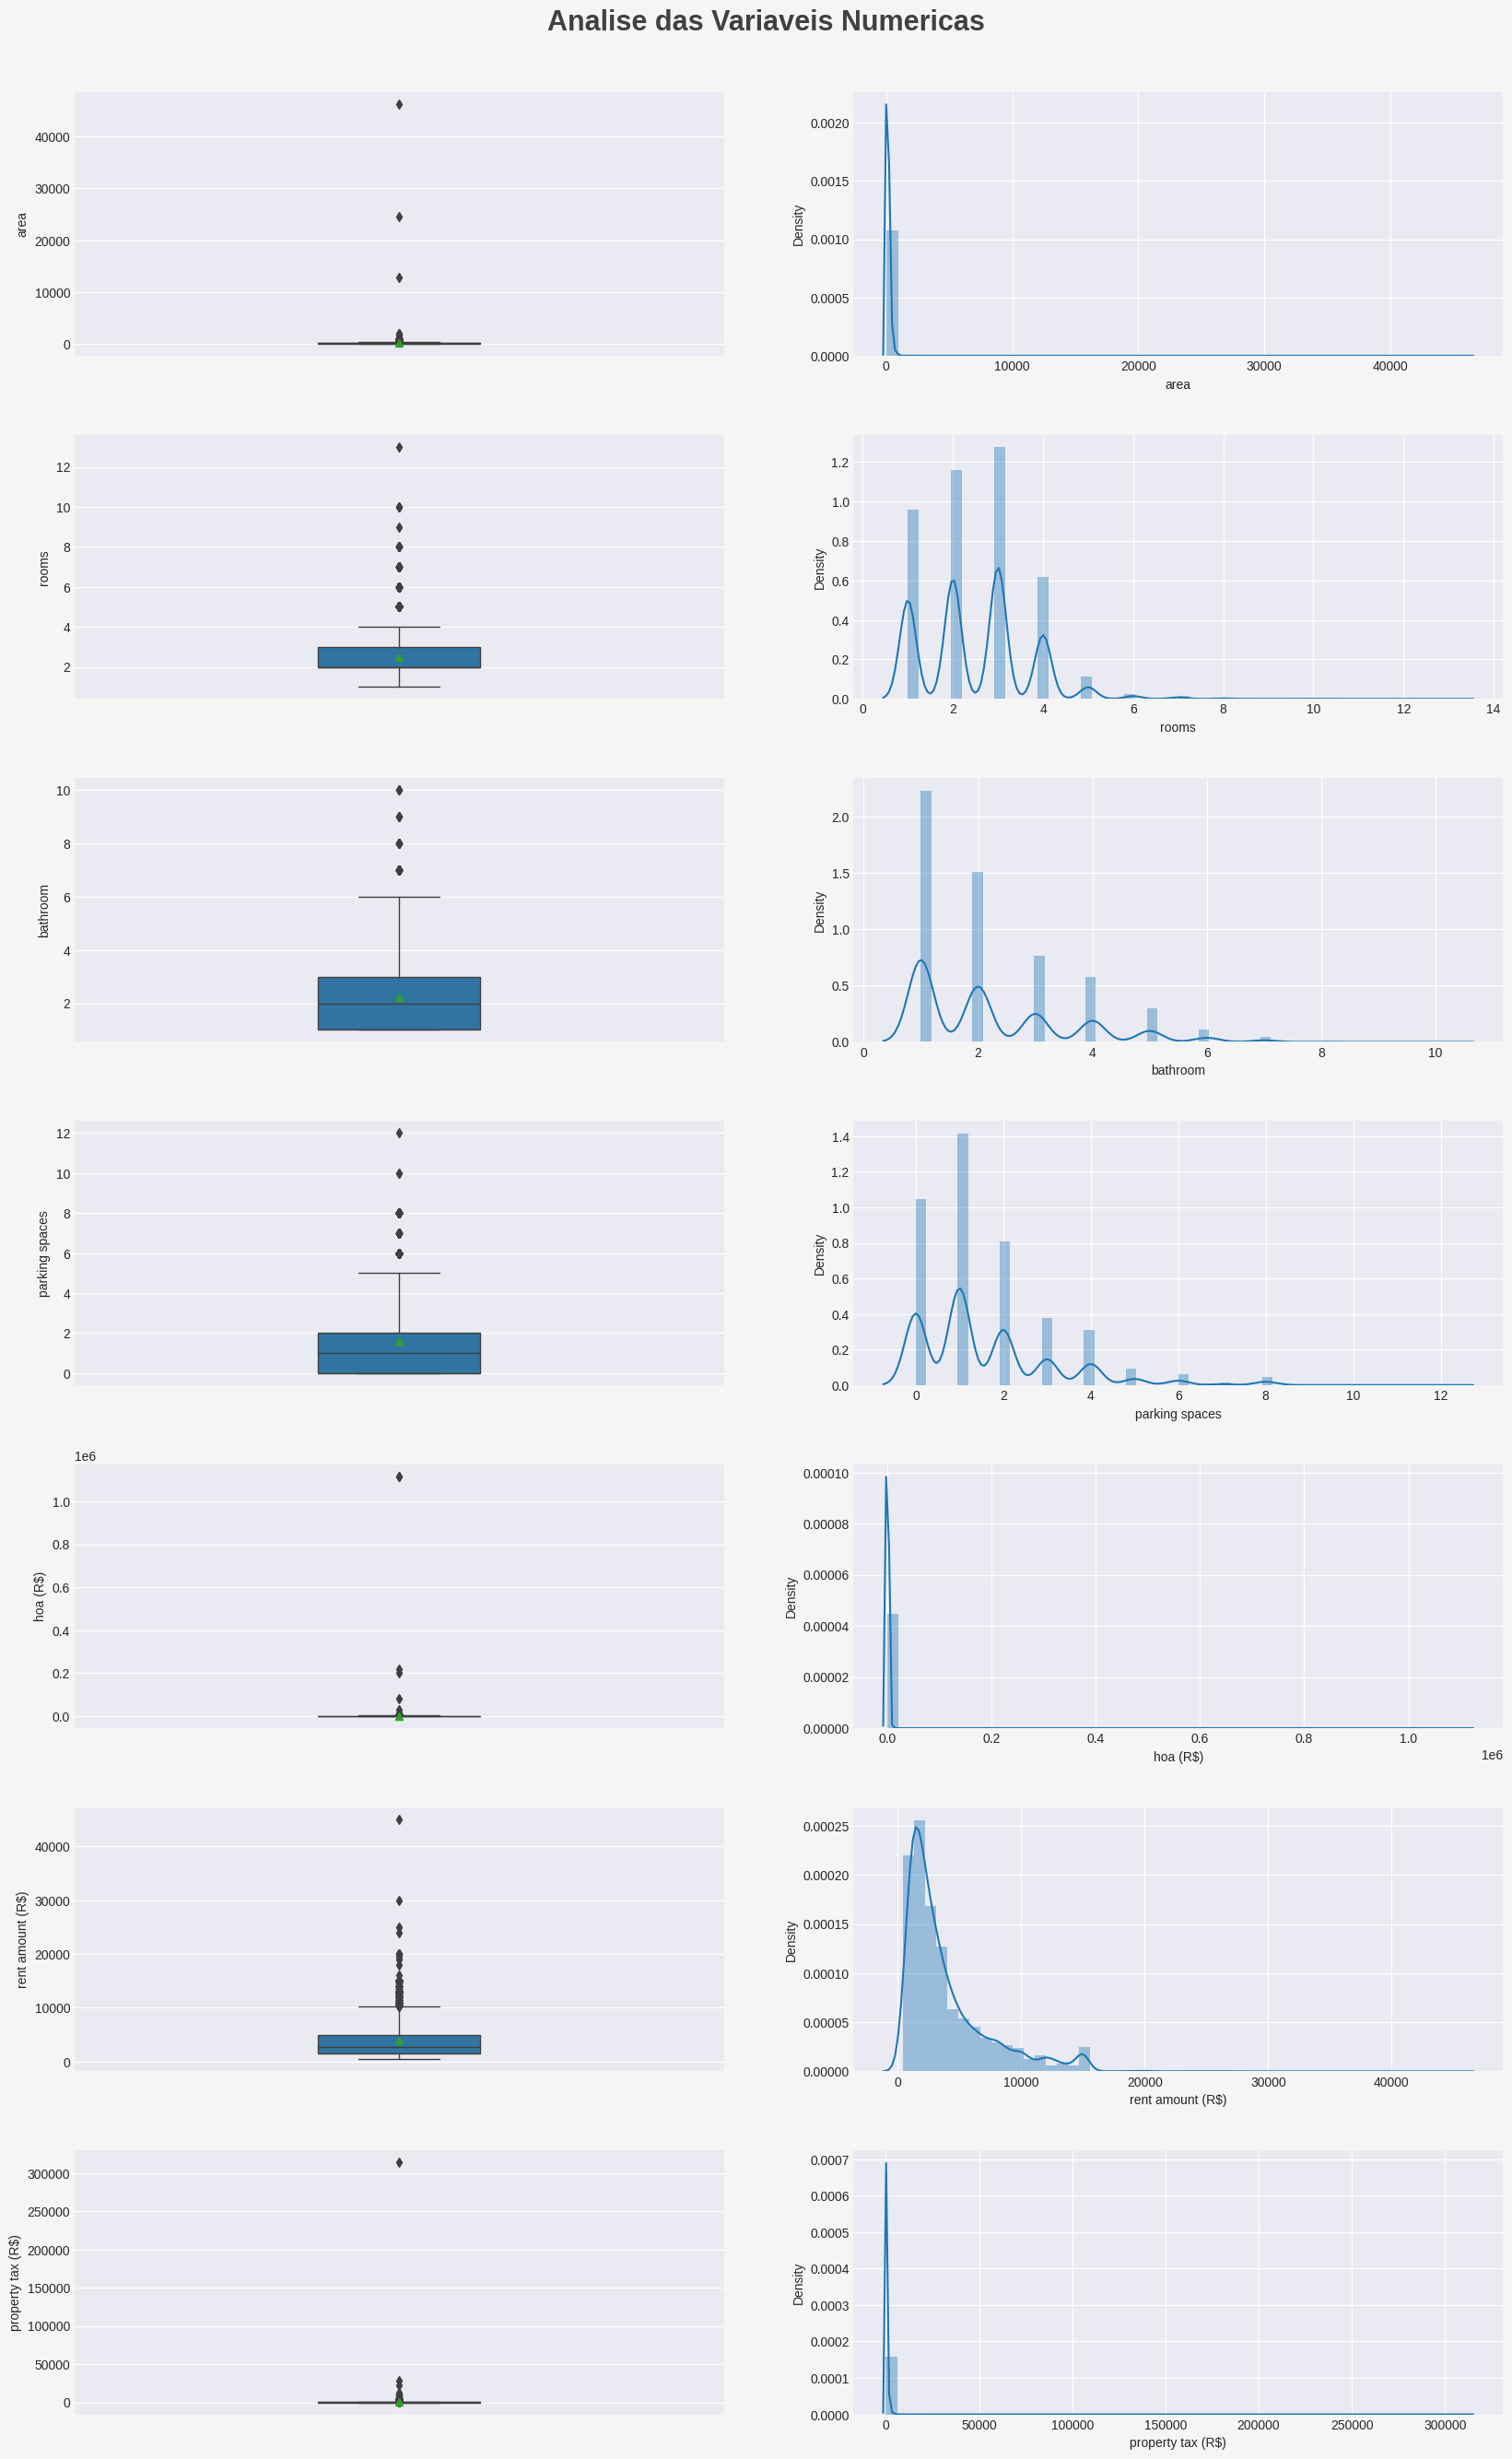

In [28]:
# Graficos

# Tamanho
figura, eixo = plt.subplots(figsize=(20,30))

# Cor
cor_fundo = '#f5f5f5'
figura.set_facecolor(cor_fundo)

# Paleta de cores
paleta_cores = sns.color_palette('flare', len(colunas_numericas) * 2)

# Título
plt.suptitle('Analise das Variaveis Numericas', fontsize=22, color='#404040', fontweight=600)

# Estruturas
linhas = len(colunas_numericas)
colunas = 2
posicao = 1 # posicao inicial do grid

# Loop
for coluna in colunas_numericas:
  # Plot no grid
  plt.subplot(linhas, colunas, posicao)
  posicao += 1
  sns.boxplot(data=bd,y=coluna, showmeans=True, saturation=0.75,
              linewidth=1, width=0.25)

  plt.subplot(linhas, colunas, posicao)
  posicao += 1
  sns.distplot(bd[coluna])

# Ajuste de Grid
plt.subplots_adjust(top=0.95, hspace=0.3) # espaco dado entre os gráficos. top é acima e hspace é nos lados

In [29]:
# podemos observar alguns outliers

In [30]:
bd.loc[bd['area'] <=10000]['area'].describe()       # descreve sobre a area que seja menor ou igual a 10000

# bd['area'].describe()                             # descreve sobre a area

count    10689.000000
mean       141.431846
std        134.348219
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max       2000.000000
Name: area, dtype: float64

# **Engenharia de Features**

In [31]:
# Ajuste das colunas categorica
colunas_categoricas

Index(['city', 'floor', 'animal', 'furniture'], dtype='object')

In [32]:
bd['animal']

0            acept
1            acept
2            acept
3            acept
4        not acept
           ...    
10687    not acept
10688        acept
10689    not acept
10690        acept
10691        acept
Name: animal, Length: 10692, dtype: object

In [33]:
# Ajuste nas colunas categoricas pra numerico
bd['animal'] = bd['animal'].map({'acept':1, 'not acept':0})
bd['furniture'] = bd['furniture'].map({'furnished':1, 'not furnished':0})

In [35]:
# Filtrar a cidade de SP
# MVP --> Valor para o Cliente. Começamos com SP e se der tudo certo implementamos em outros estados

filtro_sp = bd.loc[bd['city'] == 'São Paulo']
filtro_sp.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
4,São Paulo,25,1,1,0,1,0,0,0,800,25
5,São Paulo,376,3,3,7,0,1,0,0,8000,834
7,São Paulo,213,4,4,4,4,1,0,2254,3223,1735


In [36]:
# retirando a coluna city
filtro_sp.drop(columns=['city'], inplace=True)

In [37]:
# separação dos dados
caracteristicas = filtro_sp.drop(columns=['rent amount (R$)'])  # variáveis exceto a alvo
previsor = filtro_sp['rent amount (R$)']                        # variável alvo

In [42]:
# verificar
caracteristicas.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$)
0,70,2,1,1,7,1,1,2065,211
1,320,4,4,0,20,1,0,1200,1750
4,25,1,1,0,1,0,0,0,25
5,376,3,3,7,0,1,0,0,834
7,213,4,4,4,4,1,0,2254,1735


In [43]:
previsor.head()

0    3300
1    4960
4     800
5    8000
7    3223
Name: rent amount (R$), dtype: int64

In [44]:
# correlacao
filtro_sp.corr()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
area,1.000000,0.306863,0.316543,0.300795,-0.038790,0.073565,-0.018145,0.056091,0.274749,0.065289
rooms,0.306863,1.000000,0.759432,0.645041,-0.092117,0.213963,-0.088931,0.136343,0.537622,0.071702
bathroom,0.316543,0.759432,1.000000,0.703530,-0.015503,0.159097,0.005864,0.163205,0.638924,0.101616
parking spaces,0.300795,0.645041,0.703530,1.000000,-0.038378,0.165253,-0.015155,0.115951,0.573373,0.092362
floor,-0.038790,-0.092117,-0.015503,-0.038378,1.000000,-0.014202,0.135180,0.107211,0.065294,0.005672
animal,0.073565,0.213963,0.159097,0.165253,-0.014202,1.000000,-0.066208,0.020575,0.107147,-0.005308
furniture,-0.018145,-0.088931,0.005864,-0.015155,0.135180,-0.066208,1.000000,0.042860,0.154316,-0.007852
hoa (R$),0.056091,0.136343,0.163205,0.115951,0.107211,0.020575,0.042860,1.000000,0.188147,0.028872
rent amount (R$),0.274749,0.537622,0.638924,0.573373,0.065294,0.107147,0.154316,0.188147,1.000000,0.091749
property tax (R$),0.065289,0.071702,0.101616,0.092362,0.005672,-0.005308,-0.007852,0.028872,0.091749,1.000000


In [ ]:
# proximo de 1 - correlação positiva, ambas sobem
# proximo de -1 - correlação negativa, uma sobe outra desce

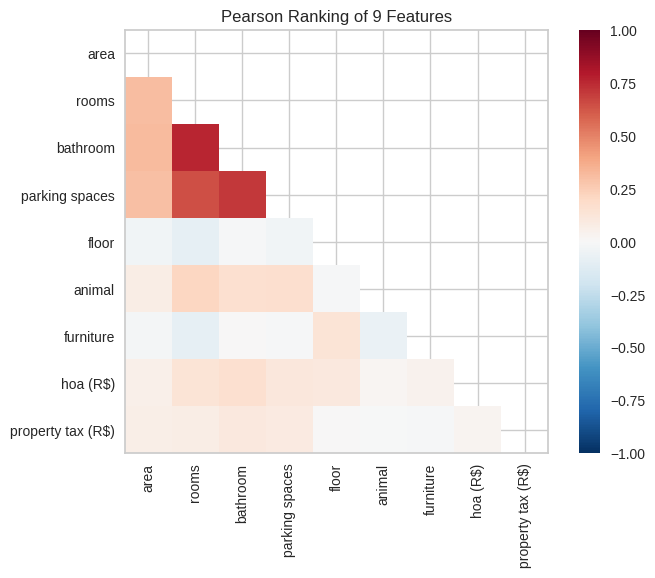

In [49]:
# Yellowbrick
from yellowbrick.features import Rank2D

# Definir o metodo
Correlacao = Rank2D( algoritmo='pearson' )

# Fitar função
Correlacao.fit( caracteristicas, previsor )
Correlacao.transform( caracteristicas )
Correlacao.show();

In [52]:
# separacao dos dados
from sklearn.model_selection import train_test_split

# divisao
x_treino, x_teste, y_treino, y_teste = train_test_split(         # x representa as características e y a variável alvo
    caracteristicas, previsor, test_size=0.2, random_state=10
)

print(f'Dados de treino: {x_treino.shape[0]}')
print(f'Dados de teste: {x_teste.shape[0]}')

Dados de treino: 4709
Dados de teste: 1178


In [53]:
# Features mais relevantes
from sklearn.feature_selection import mutual_info_regression   # avalia a dependencia entre duas variáveis. Se for igual a 0, não existe dependencia, e quanto maior o valor, maior a dependencia.
from sklearn.feature_selection import SelectKBest

# Selecao de features
def Selecao_Features( x_treino, y_treino ):

  # Configurar para selecionar as features
  Selecao = SelectKBest( score_func=mutual_info_regression, k=5 )

  # Fitar o aprendizado
  Selecao.fit( x_treino, y_treino )

  return Selecao

# Aplicar essa função
Scores = Selecao_Features( x_treino, y_treino )

# Analisar
for Posicao, Score in enumerate( Scores.scores_ ):
  print( f' { x_treino.columns[Posicao] } : {Score}' )

 area : 0.06491794632867398
 rooms : 0.24285374751807742
 bathroom : 0.3111144936349137
 parking spaces : 0.23806175627861048
 floor : 0.02924137661885773
 animal : 0.029142806349129025
 furniture : 0.026905597004545534
 hoa (R$) : 0.06971824411680538
 property tax (R$) : 0.16964294126749602


In [ ]:
# Foi feito uma analise de quais filtros tem uma relação maior com a variável alvo. Observamos as variaveis rooms e bathroom.

# **Modelo de ML**

In [54]:
# Modelo Random Forest Regresson
from sklearn.ensemble import RandomForestRegressor        # Cria arvores de decisões e pondera a melhor

# Instanciar
Modelo_Floresta = RandomForestRegressor( max_depth=5 )

# Fitar
Modelo_Floresta.fit( x_treino, y_treino )

RandomForestRegressor(max_depth=5)

In [55]:
# Avaliar a performance
Previsoes = Modelo_Floresta.predict( x_teste )

# Funcao para avaliar
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

print(f'RMSE: { sqrt(mean_squared_error( y_teste, Previsoes ) ) } ')
print(f'Score: { r2_score( y_teste, Previsoes ) } ')

RMSE: 2457.8164126433553 
Score: 0.5627895253613295 


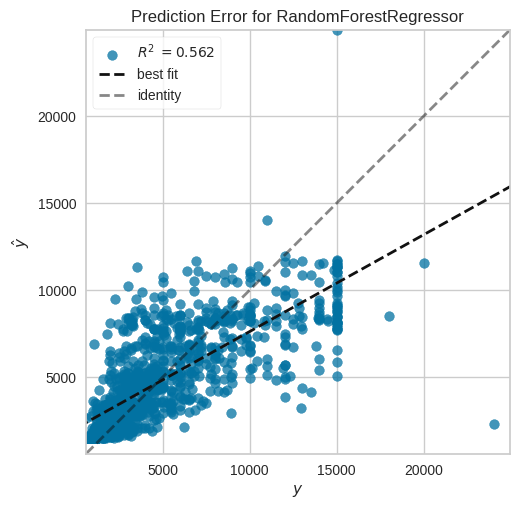

In [56]:
# Avaliando Yellowbrick
from yellowbrick.regressor import PredictionError

# Instanciar
Modelo = RandomForestRegressor( max_depth=5 )
Erro_Modelo = PredictionError( Modelo )

# Fitar
Erro_Modelo.fit( x_treino, y_treino )
Erro_Modelo.score( x_teste, y_teste )
Erro_Modelo.show();